## Connecting and Interacting with AWS S3 bucket using Python
- Cloud storage is widely used for almost all kinds of work
- Most often during an end to end Machine Learning Implementation, the data(Batch data) from the client can be provided to us via such cloud storage services like AWS S3 bucket or Azure Blob. Hence, having the skill to interact with the cloud storage is important

In order to connect with the AWS S3 buckets follwoing libraries are needed to be installed
- pip install boto3
- pip install s3fs


In [4]:
import boto3
import os
import pandas as pd

In [6]:
os.environ['AWS_DEFAULT_REGION'] = 'us-east-1'
os.environ['AWS_ACCESS_KEY_ID'] = '**Your Key**'
os.environ['AWS_SECRET_ACCESS_KEY'] = '**Your Secret Key**'

Before this, create a IAM user or use an existing IAM user and make sure this user has the full access to S3 

In [7]:
#creating an object to connect with the s3 via IAM user 
s3_client = boto3.resource('s3')
s3_client = boto3.resource(
            service_name = 's3',
            region_name= os.environ.get('AWS_DEFAULT_REGION'),
            aws_access_key_id= os.environ.get('AWS_ACCESS_KEY_ID'),
            aws_secret_access_key= os.environ.get('AWS_SECRET_ACCESS_KEY')
            
)


In [9]:
# ensuring a connection has been established 
for buckets in s3_client.buckets.all():
    print(buckets.name)

abhishekmazumdar
codepipeline-us-east-1-186263152141
elasticbeanstalk-us-east-1-550277357720
testbucketbobmaz


In [10]:
#creating two sample data frames and saving to a csv file so as to upload them via this notebook 

animal = pd.DataFrame({'num_legs': [2, 4, 8, 0],
                   'num_wings': [2, 0, 0, 0],
                   'num_specimen_seen': [10, 2, 1, 8]},
                  index=['falcon', 'dog', 'spider', 'fish'])

colors = pd.DataFrame({'numbers': [1, 2, 3], 'colors': ['red', 'white', 'blue']}, 
                  columns=['numbers', 'colors'])

#files are saved in the local directory 
animal.to_csv('animals.csv')
colors.to_csv('colors.csv')

### Uploading files in the S3 bucket 

- the files will be uploaded to the testbucketbobmaz bucket

In [14]:
s3_client.Bucket('testbucketbobmaz').upload_file(Filename='animals.csv', Key= 'animals.csv')
s3_client.Bucket('testbucketbobmaz').upload_file(Filename='colors.csv', Key= 'colors.csv')

In [15]:
#to check whether the files are uploaded or not 
for ob in s3_client.Bucket('testbucketbobmaz').objects.all():
    print(ob)

s3.ObjectSummary(bucket_name='testbucketbobmaz', key='animals.csv')
s3.ObjectSummary(bucket_name='testbucketbobmaz', key='colors.csv')


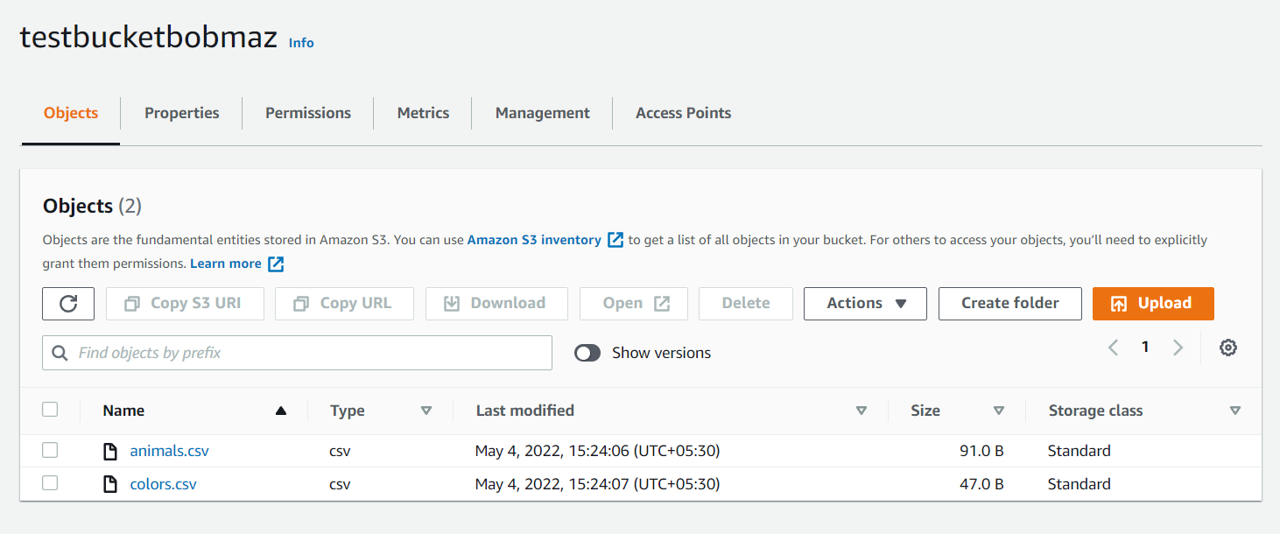

### Reading files directly from the bucket

In [18]:
file_object = s3_client.Bucket('testbucketbobmaz').Object('colors.csv').get()
file_object

{'ResponseMetadata': {'RequestId': '5WH6JG3XPHDW4DM9',
  'HostId': 'f/wITTFJIbBNOco4IC+WbgIM8xqdvJoHjpIR5tS+1YdV3rYIb6+vlaByJPNpTiJj34cHVGTrpbM=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'f/wITTFJIbBNOco4IC+WbgIM8xqdvJoHjpIR5tS+1YdV3rYIb6+vlaByJPNpTiJj34cHVGTrpbM=',
   'x-amz-request-id': '5WH6JG3XPHDW4DM9',
   'date': 'Wed, 04 May 2022 10:00:44 GMT',
   'last-modified': 'Wed, 04 May 2022 09:54:07 GMT',
   'etag': '"6a5aa877483a7d5136a1e04b40f911fd"',
   'x-amz-version-id': 'ZqFcp0vXgsDD0S7KEtPuCeu..cvLphBC',
   'accept-ranges': 'bytes',
   'content-type': 'binary/octet-stream',
   'server': 'AmazonS3',
   'content-length': '47'},
  'RetryAttempts': 0},
 'AcceptRanges': 'bytes',
 'LastModified': datetime.datetime(2022, 5, 4, 9, 54, 7, tzinfo=tzutc()),
 'ContentLength': 47,
 'ETag': '"6a5aa877483a7d5136a1e04b40f911fd"',
 'VersionId': 'ZqFcp0vXgsDD0S7KEtPuCeu..cvLphBC',
 'ContentType': 'binary/octet-stream',
 'Metadata': {},
 'Body': <botocore.response.StreamingBody at 0

In [19]:
# we are interested in the key 'Body'
colors = pd.read_csv(file_object['Body'], index_col=0)
colors.head()

,numbers,colors
0,1,red
1,2,white
2,3,blue


### Downloading files to the local system 

In [21]:
# while downloading the file, a file name has to be given with which the downloaded file will be saved
s3_client.Bucket('testbucketbobmaz').download_file(Key='animals.csv', Filename='sampledwn.csv')

### Deleting files from the bucket

In [22]:
s3_client.Object('testbucketbobmaz', 'animals.csv').delete()

{'ResponseMetadata': {'RequestId': '5MSJVZK7XXHHY361',
  'HostId': '8yh6QUoN51rxXw3Ar6ue+NSbjUVac6eZeuX4GvJsYEVyhADZDjFZm1aHNHmRDxUdnf7rVWIxPoU=',
  'HTTPStatusCode': 204,
  'HTTPHeaders': {'x-amz-id-2': '8yh6QUoN51rxXw3Ar6ue+NSbjUVac6eZeuX4GvJsYEVyhADZDjFZm1aHNHmRDxUdnf7rVWIxPoU=',
   'x-amz-request-id': '5MSJVZK7XXHHY361',
   'date': 'Wed, 04 May 2022 10:05:19 GMT',
   'x-amz-version-id': 'bT7LB_yNAOwgJuzW0o2vM2utR2h2J7Rt',
   'x-amz-delete-marker': 'true',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'DeleteMarker': True,
 'VersionId': 'bT7LB_yNAOwgJuzW0o2vM2utR2h2J7Rt'}

In [23]:
#to check whether the file is deleted 
for ob in s3_client.Bucket('testbucketbobmaz').objects.all():
    print(ob)

s3.ObjectSummary(bucket_name='testbucketbobmaz', key='colors.csv')


### Creating a bucket using python 

In [24]:
s3_client.create_bucket(Bucket='boto3bukettest', CreateBucketConfiguration={
    'LocationConstraint': 'us-west-1'})

s3.Bucket(name='boto3bukettest')

In [25]:
# As seen, the new bucket is created using the above command
for buckets in s3_client.buckets.all():
    print(buckets.name)

abhishekmazumdar
boto3bukettest
codepipeline-us-east-1-186263152141
elasticbeanstalk-us-east-1-550277357720
testbucketbobmaz
